In [1]:
import os 
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
#os.listdir()
 

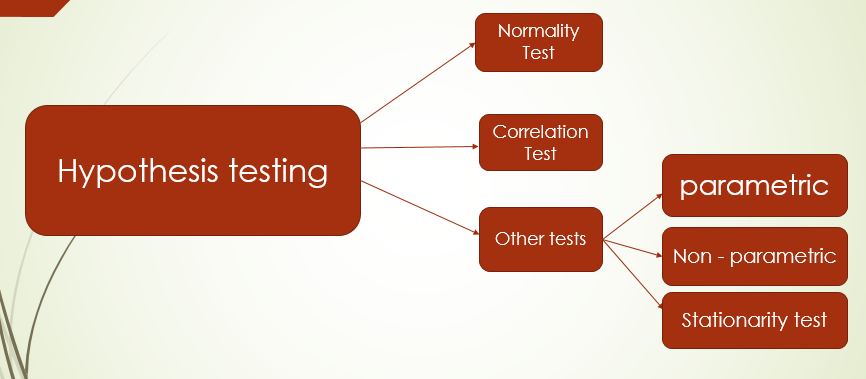

In [3]:
Image(data='images/Hypothesis testing tests.png',width=500,height=500 )

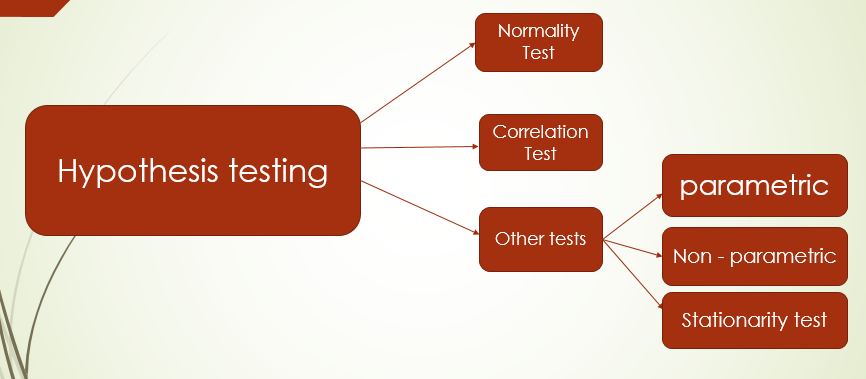

In [4]:
Image(data='images/Hypothesis testing tests.png',width=500,height=500 )

# Normal Testing (Shapiro-Wilk Test : tests If data is normally distributed) 

> **Assumption: Data is notrmally Distributed**

- **Normal testing use to check the  data is normally distributed or not**
- **In Machine Learningsome of the algorithms required data Normally Distributed**
- **for example : Linear regression , Log reg , etc**

In [20]:
import os 
os.getcwd()
os.chdir("E:\\All about Hypothesis")

# E:\All about Hypothesis\datasets\winequalityNdataset.csv
os.getcwd()


'E:\\All about Hypothesis'

In [23]:
import pandas as pd 
df = pd.read_csv('.\datasets\winequalityNdataset.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [24]:
numerical_columns = [x for x in df.select_dtypes(exclude='O').columns]
categorical_columns = [x for x in df.select_dtypes(include='O').columns]
print('Numerical Columns ', numerical_columns )
print('Categorical Columns' ,categorical_columns)

Numerical Columns  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Categorical Columns ['type']


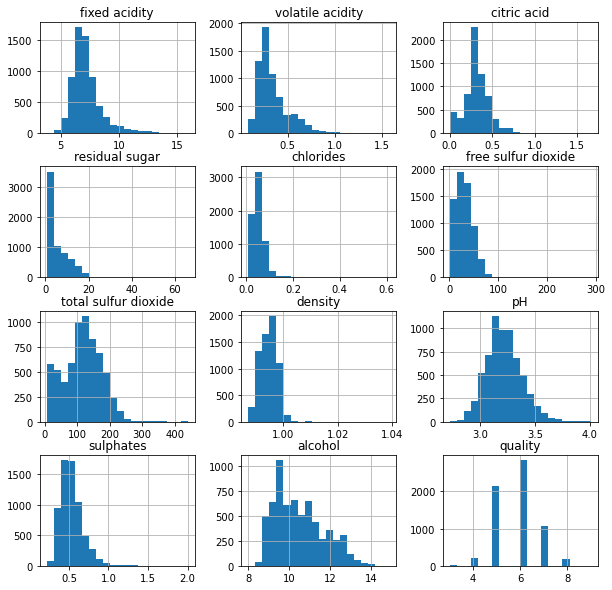

In [25]:
df[numerical_columns].hist(bins=20,figsize=(10,10))
plt.show()

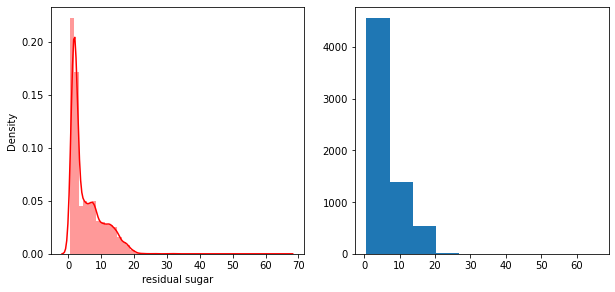

In [26]:
# here we select  any one numerical column and try to check wheather data is normally distrubuted or not 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot( df['residual sugar'].dropna() , kde= True , color='r')
plt.subplot(2,2,2)
plt.hist(x =df['residual sugar'].dropna() )
plt.show()
# in following diagram data not seems to be normally distriuted 

In [27]:
#let`s apply the test to prove 
from scipy.stats import shapiro 

DataTotest = df['residual sugar'].dropna()

stat , p = shapiro(x = DataTotest)
print(f'stats ==> {stat} , P-Value ==> {p}')

if p > 0.05 :
    print("\n Data is  Normally Distributed... ")
    
else :
    print("Data is Not Normally Distributed....")



stats ==> 0.8247590661048889 , P-Value ==> 0.0
Data is Not Normally Distributed....


In [28]:
# taking the random normally disrtibuted data using numpy
# apply shapiro test to check the normality 
np.random.seed(seed = 10)
random_data = np.random.randn(1000) # Return a sample (or samples) from the "standard normal" distribution.

<AxesSubplot:ylabel='Density'>

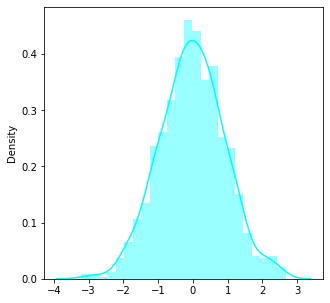

In [29]:
plt.figure(figsize=(5,5))
sns.distplot( a  = random_data ,kde=True ,color='aqua')
# data seems to be normally distributed 

In [30]:
from scipy.stats import shapiro 

stat , P_value = shapiro(random_data)

print(f'stats ==> {stat} , P-Value ==> {P_value}')

if P_value > 0.05 :
    print("\n Data is  Normally Distributed... ")
    
else :
    print("Data is Not Normally Distributed....")

stats ==> 0.9987097382545471 , P-Value ==> 0.6950954794883728

 Data is  Normally Distributed... 


``` python 

def IsNormallyDistributed(data):
    '''data:- Numerical data only '''
    from scipy.stats import shapiro 
    stat , p = shapiro(data)
    print(f'stat :{stat}')
    print(f'P_value : {p}')
    
    if p > 0.005 :
        print('Data is Normally Distributed ... ')
    else :
        print('Data is not Normally Distributed ...') 
    
```

# Normality test using K^2 Normality Test Test : tests If data is normally distributed

 > **Assumption : Data is normally Distributed**

In [32]:
from scipy.stats import normaltest

data = random_data

stat , p = normaltest(data)

print(f'stats ==> {stat} , P-Value ==> {p}')

if p > 0.05 :
    print("\n Data is  Normally Distributed... ")
    
else :
    print("Data is Not Normally Distributed....")


stats ==> 0.4779452983306948 , P-Value ==> 0.7874364191214613

 Data is  Normally Distributed... 


<AxesSubplot:ylabel='Density'>

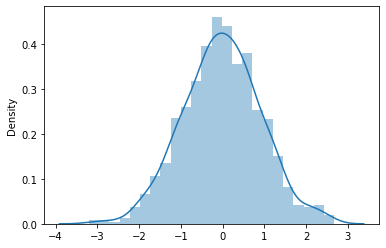

In [33]:
sns.distplot(data)

# Correlation Test - Pearson and Spearman’s Rank Correlation

> **This test are use to check the `correlation of the Numerical Features`**

> **Asumption - Identical and Normal Distribution**

- **During feature selection we removes the one of the correlated independent feature , to reduce the multi-colinearity**

**let's check follwing columns are correlated or not**

In [34]:
FirstSample = df.loc[ : ,'total sulfur dioxide']
SecondSample = df.loc[ :,'free sulfur dioxide']

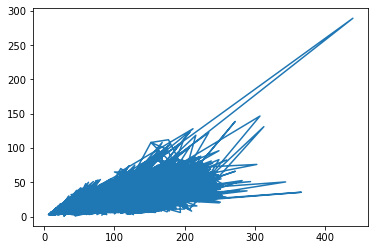

In [35]:
plt.plot(FirstSample ,SecondSample )
plt.show()
# by seeing this diagram it's hard to decied the features are correlated or not 
# but at the some portion we'll get to see the linearity 

##  Spearman’s Rank Correlation

In [36]:
from scipy.stats import spearmanr 

stat , p = spearmanr(FirstSample , SecondSample)
print(f'stats ==> {stat} , P-Value ==> {p}')

if p > 0.05 :
    print(" \n Features are Not Correlated... ")
    
else :
    print("Features are  Correlated... ....")
    
# here the p_value is less than 0.005 hence we reject the null hypothesis 


stats ==> 0.7414377922869034 , P-Value ==> 0.0
Features are  Correlated... ....


## pearson correlation

In [37]:
from scipy.stats import pearsonr

stat , p = pearsonr(FirstSample ,SecondSample)
print(f'stats ==> {stat} , P-Value ==> {p}')

if p > 0.05 :
    print("\n Features are Not Correlated... ")
    
else :
    print("Features are  Correlated... ....")
    
# here the p_value is less than 0.005 hence we reject the null hypothesis 


stats ==> 0.7209340813785245 , P-Value ==> 0.0
Features are  Correlated... ....


In [38]:
corr = df.corr(method='pearson')
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


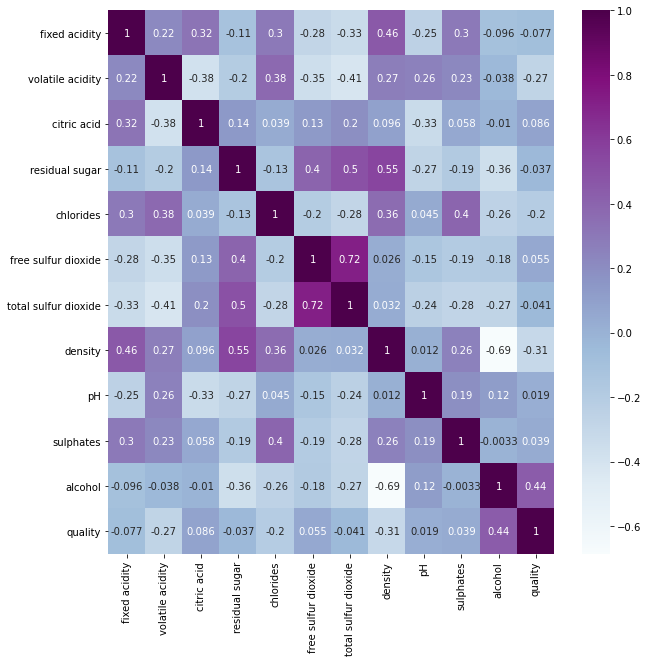

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True ,cmap="BuPu")
plt.show()

**From this correlation visualization, we will find which features are correlated with other features. so we will use a python program to find those features**

In [40]:
colm = []
# loop for columns
for i in range(len(df.corr().keys())): 
# loop for rows
  for j in range(i):
    if abs(df.corr().iloc[i,j]) > 0.7:
      colm.append (df.corr().columns[i] )

In [41]:
colm

['total sulfur dioxide']

# Correlation of categorical variable - Chi square test

- **`Tests whether two categorical variables are related or independent`.**
- **Assumptions - `independent observation, size in each box of contingency table > 25`**
- Example of the Chi-Squared Test


In [43]:
dataframe = pd.read_csv('.\datasets\credit_test_dataset.csv')
categorical_col = [x for x in dataframe.select_dtypes(include="O").columns]
print(categorical_col)
dataframe.head(2)

['Loan ID', 'Customer ID', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0


In [44]:
contingency_data = pd.crosstab(dataframe['Term'] ,dataframe['Purpose'])
contingency_data

Purpose,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
Term,,,,,,,,,,,,,,,,
Long Term,41,12,38,2235,1,166,14,61,1,10,0,110,0,13,2,1
Short Term,122,58,104,5643,13,427,99,247,43,42,14,451,1,18,4,9


In [45]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('h0 : independent categories')
else:
    print('dependent categories')

stat=76.004, p=0.000
dependent categories


In [46]:
contingency_data = [[25,125],[1200,240]] #Observe the numbers carefully

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=337.622, p=0.000
dependent categories


# Parametric Test 1 . (t-tests)

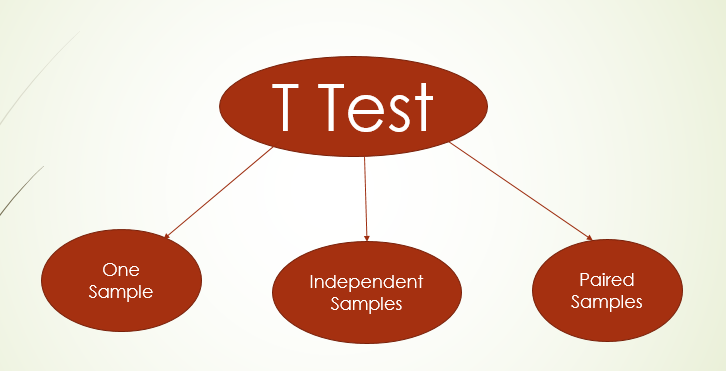

In [49]:
Image(data='./images/parametric test.png',width=500,height=500 )

## Definiton of Parametric test - Main assumption - data is normally distributed

> `population std dev is not given`

In [50]:
#Scores of me and Virat
my_score = [23,21,31,20,19,35,26,22,21,19]
virat_score = [46,42,62,40,38,70,52,44,42,38]

In [51]:
import numpy as np
print('MY mean score:', np.mean(my_score))
print('Virat mean score:', np.mean(virat_score))

MY mean score: 23.7
Virat mean score: 47.4


Text(0.5, 1.0, 'Distribution of the my_score')

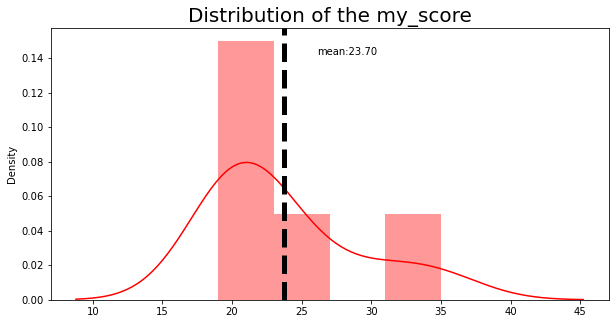

In [52]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(my_score , color='red')
plt.axvline(x=np.mean(my_score) ,ymin=0 , color ='k' , linestyle='dashed' , linewidth=5)
_,max_ = plt.ylim()
plt.text(np.mean(my_score)+ np.mean(my_score)/10,
        max_ - max_/10
        , "mean:{:.2f}".format(np.mean(my_score)))
plt.title("Distribution of the my_score" , fontsize=20)

Text(0.5, 1.0, 'Distribution of the virat_score')

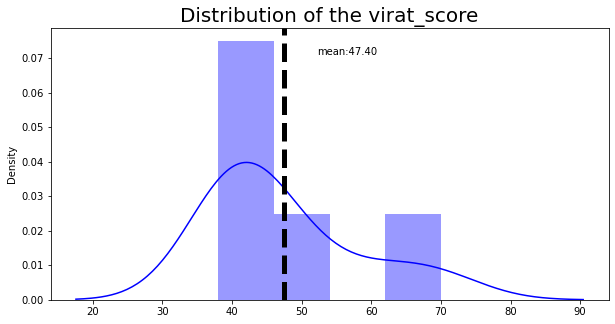

In [53]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(virat_score , color='blue')
plt.axvline(x=np.mean(virat_score) ,ymin=0 , color ='k' , linestyle='dashed' , linewidth=5)
_,max_ = plt.ylim()
plt.text(np.mean(virat_score)+ np.mean(virat_score)/10,
        max_ - max_/10
        , "mean:{:.2f}".format(np.mean(virat_score)))
plt.title("Distribution of the virat_score" , fontsize=20)

**Comparing the mean & distribution of the my_score and virat score**

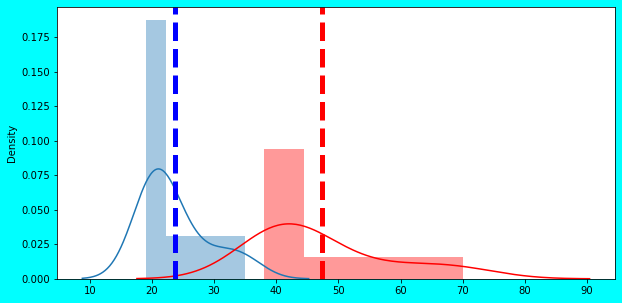

In [55]:
plt.figure(figsize=(10,5) ,facecolor='aqua',
    edgecolor='red',)
ax1 = sns.distplot(my_score ,bins=5)
ax2 = sns.distplot(virat_score , color='red' , bins=5)
plt.axvline(np.mean(my_score) , color = 'b' , linestyle= "dashed" , linewidth=5)
plt.axvline(np.mean(virat_score) , color = 'red' ,  linestyle= "dashed" , linewidth=5)

In [56]:
# in above daigram the mean and distributin of the both scores  seems `NOT Equal`.

In [57]:
# let's assume the i've taken the sample score data having mean = 23.7  , 
# and given the population mean = 40 
#  let's check the sample mean == population mean or Not equal 
# Null hypothesis : population mean and sample mean are equal 
# Alternate hypothesis : -  mhu != x_bar
# to compare the sample mean with the population mean of the same data we use t-test(1 sample)

In [58]:
from scipy.stats import ttest_1samp # single sample test 

stat , p = ttest_1samp(a=my_score ,popmean=40)
# here a =sample data , popmean = Population mean (with we've to campare sample mean)

print(f'stats ==> {stat} ,\n P-Value ==> {p}')

if p > 0.05 :
    print('We Accept The Null hypothesis , Population mean & sample mean are equal..')
else:
    print("We reject the Null hypothesis , Population mean & sample mean are 'Not Equal'.. ")

# here the p_value is less than 0.005


stats ==> -9.551582884375781 ,
 P-Value ==> 5.235177677406647e-06
We reject the Null hypothesis , Population mean & sample mean are 'Not Equal'.. 


## Two sample t-test for Difference mean (independent)

 - when to use ? == > to compare the mean of two independent samples 

> `Null Hypothesis :  mean of two independant samples are Equal`

> **Population Data is normally distributed**

> **sample should be selected randomly**

> **sample size < 30**

> **population 1 variance == population 2 varinace**

In [59]:
# let's suppose , we collected the two samples from two different populations
# sample 1 is collected from population 1
# sample 2  is collected from population 2 
# now we have to check the x_bar1 & x_bar2 are statistically significance or not 
# Population std dev is not given 
# sample size can be different 
# sample size should be less than 30

my_score = [23,21,31,20,19,35,26,22,21,19]
virat_score = [46,42,62,40,38,70,52,44,42,38]
#here we have two samples (my_score and Virat_score) collected from two different population 


In [60]:
sample1 = my_score
sample2 = virat_score

from scipy.stats import ttest_ind

stat , p =  ttest_ind(a = sample1 , b = sample2)

print(f'stats ==> {stat} ,\n P-Value ==> {p}')


if p > 0.005 :
    print('We Accept The Null hypothesis , Both samples mean are equal..')
else:
    print("We reject the Null hypothesis , Both samples mean are 'NOT Equal' ")



stats ==> -6.210850679090182 ,
 P-Value ==> 7.3390410384768156e-06
We reject the Null hypothesis , Both samples mean are 'NOT Equal' 


In [61]:
np.mean(sample1)

23.7

In [62]:
np.mean(sample2)

47.4

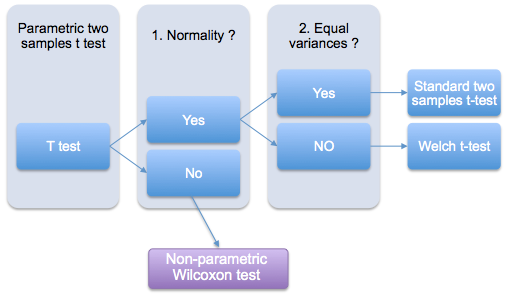

In [64]:
#When to use which test ?
Image(data='.\images\parametric and non parametric test.png',width=500,height=500)

# Parametic test - Anova - Tests whether the means of two or more independent POP

> **`Null Hypothesis : Same distribution of scores`**

> **When to use?**

> **When we've to Check whether the mean of two or more than two independent samples are statistically Equal or not**

> **Here the data should be Normally Distributed , Having same variance , Identical Distribution**

In [69]:
# H0 = mhu1 = mhu2 = mhu3
# h1 = mhu1 != mhu2 != mhu3

In [70]:
# assume we have threee sample collected from the three differnt populations 

my_score = [23,21,31,20,19,35,26,22,21,19]
virat_score = [46,42,62,40,38,70,52,44,42,38]
saurav_score = [40,44,60,50,48,68,55,46,44,54]

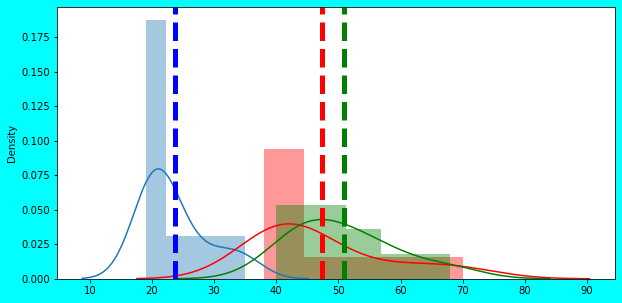

In [71]:
plt.figure(figsize=(10,5) ,facecolor='aqua',
    edgecolor='red',)
ax1 = sns.distplot(my_score ,bins=5)
ax2 = sns.distplot(virat_score , color='red' , bins=5)
ax3 = sns.distplot(saurav_score , color='green' , bins=5)
plt.axvline(np.mean(my_score) , color = 'b' , linestyle= "dashed" , linewidth=5)
plt.axvline(np.mean(virat_score) , color = 'red' ,  linestyle= "dashed" , linewidth=5)
plt.axvline(np.mean(saurav_score) , color = 'green' ,  linestyle= "dashed" , linewidth=5)

In [72]:
from scipy.stats import f_oneway  # one way annova(analysis of variance )

tstat, p = f_oneway(my_score, saurav_score, virat_score)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution of scores')
else:
    print('Reject the Null Hypothesis , Different distributions of scores')

stat=-6.211, p=0.000
Reject the Null Hypothesis , Different distributions of scores


In [73]:
class_1_score = [91,90,81,80,76]
class_2_score = [88,86,85,84,83]